<a href="https://colab.research.google.com/github/jonathanAmancioSales/Previsao_de_Fraudes/blob/master/Previsao_de_Fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**:
Realizar um estudo baseado em um histórico de aproximadamente 30 dias de conversões e de clicks do aplicativo da Evo Horizon, para tentar entender quais são os padrões de fraude de instalação.

# Bibliotecas e Configurações

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif','fontname': 'Times New Roman'})

In [3]:
from google.colab import files

uploaded = files.upload()

Saving evo_horizon_conversions.csv to evo_horizon_conversions.csv


# Tabela de conversões

In [4]:
df = pd.read_csv('evo_horizon_conversions.csv')
df.sample(4)

,event_time,click_time,app_name,city,os,device,device_id,source_id,goal_name,isp,browser
737,2021-04-16 19:01:41,2021-04-16 18:59:53,com.getmimo,TAQUARANA,Android 8.1,mobile,621,145,Install,Provedora de Internet 331,Chrome 90
214,2021-04-17 11:07:31,2021-04-16 17:54:59,com.busuu.android.en,ARACATU,Android 8.1,mobile,208,145,Install,Provedora de Internet 10,Chrome 90
863,2021-05-03 08:27:02,2021-05-03 08:26:14,com.myscript.neb,ÁGUA BRANCA,Android 8.1,mobile,885,286,Fraudulent Install,Provedora de Internet 5,Chrome 86
176,2021-04-17 00:36:29,2021-04-16 22:42:31,com.busuu.android.en,ICHU,Android 8.1,mobile,123,145,Install,Provedora de Internet 8,Chrome 69


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  1068 non-null   object
 1   click_time  1068 non-null   object
 2   app_name    1068 non-null   object
 3   city        1068 non-null   object
 4   os          1068 non-null   object
 5   device      1068 non-null   object
 6   device_id   1068 non-null   int64 
 7   source_id   1068 non-null   int64 
 8   goal_name   1068 non-null   object
 9   isp         1068 non-null   object
 10  browser     1068 non-null   object
dtypes: int64(2), object(9)
memory usage: 91.9+ KB


In [6]:
df.describe(include='object')

,event_time,click_time,app_name,city,os,device,goal_name,isp,browser
count,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1045,1024,5,409,7,2,3,485,21
top,2021-05-05 20:06:29,2021-05-01 04:22:43,com.busuu.android.en,IGRAPIÚNA,Android 9.0,mobile,Install,Provedora de Internet 5,Chrome 89
freq,3,4,725,132,316,1067,733,140,439


### Alterar tipos e Criar novas colunas

In [7]:
Lista=['os','device']
for col in Lista:
  df[col]= df[col].astype('category')

In [8]:
#Reordenar categoria:
df['os'].cat.reorder_categories(['Android 6.0', 'Android 7.1', 'Android 8.0',
                                 'Android 8.1', 'Android 9.0', 'Android 10.0',
                                 'Android 11.0'], ordered=True, inplace=True)
print( df['os'].unique() )

['Android 7.1', 'Android 9.0', 'Android 10.0', 'Android 8.1', 'Android 11.0', 'Android 8.0', 'Android 6.0']
Categories (7, object): ['Android 6.0' < 'Android 7.1' < 'Android 8.0' < 'Android 8.1' < 'Android 9.0' <
                         'Android 10.0' < 'Android 11.0']


In [9]:
#Alterar tipo objeto para datetime:
df['event_time']=pd.to_datetime(df['event_time'])
df['click_time']=pd.to_datetime(df['click_time'])

#Criar nova coluna time_difference=click_time-event_time, que mostra o intervalo de tempo,
#em segundos, entre as ações de clicar na propaganda e instalar o aplicativo:
df['time_difference']=(df['event_time']-df['click_time']).astype('timedelta64[s]')

#Criar nova coluna contendo somente a data de instalação:
df['date']=df['click_time'].dt.date

### goal_name == 'purchase'

In [10]:
df['goal_name'].unique()

array(['Install', 'Fraudulent Install', 'purchase'], dtype=object)

In [11]:
print(len( df[(df['goal_name']=='purchase')] ), 'linhas.')
display( df.query('goal_name=="purchase"') )

8 linhas.


,event_time,click_time,app_name,city,os,device,device_id,source_id,goal_name,isp,browser,time_difference,date
396,2021-04-21 22:20:19,2021-04-15 16:29:23,com.busuu.android.en,BARRA DO ROCHA,Android 9.0,mobile,431,145,purchase,Provedora de Internet 196,Chrome 89,539456.0,2021-04-15
671,2021-05-01 00:27:55,2021-04-16 00:43:30,com.busuu.android.en,CAETANOS,Android 9.0,mobile,399,145,purchase,Provedora de Internet 5,Chrome 90,1295065.0,2021-04-16
1034,2021-05-06 01:09:07,2021-02-07 20:54:13,com.topps.bunt,OLHO D'ÁGUA DO CASADO,Android 10.0,mobile,5,22,purchase,Provedora de Internet 26,Chrome 88,7532094.0,2021-02-07
1038,2021-04-20 23:00:05,2021-02-02 14:41:24,com.topps.bunt,CONCEIÇÃO DO ALMEIDA,Android 10.0,mobile,1,22,purchase,Provedora de Internet 111,Chrome 88,6682721.0,2021-02-02
1041,2021-04-16 10:18:15,2021-02-05 21:54:02,com.topps.bunt,IGRAPIÚNA,Android 10.0,mobile,3,22,purchase,Provedora de Internet 468,Chrome 88,6006253.0,2021-02-05
1043,2021-04-16 00:35:53,2021-02-03 16:44:42,com.topps.bunt,ANGUERA,Android 10.0,mobile,2,22,purchase,Provedora de Internet 470,Chrome 88,6162671.0,2021-02-03
1055,2021-05-05 02:34:27,2021-02-25 02:41:15,com.topps.bunt,BARRO PRETO,Android 10.0,mobile,4,22,purchase,Provedora de Internet 478,Chrome 88,5961192.0,2021-02-25
1067,2021-04-22 23:35:39,2021-02-06 16:08:29,com.topps.bunt,NOVO LINO,Android 10.0,mobile,6,22,purchase,Provedora de Internet 485,Chrome 88,6506830.0,2021-02-06


In [12]:
#O que fazer como a categoria 'purchase' (compra)?
#Adicioná-la à categoria não-fraude:
##df[(df['goal_name']=='purchase')]='Install'

#OU

#Excluir tais dados:
idx=df[(df['goal_name']=='purchase')].index
df.drop(index=idx, inplace=True)
df=df.reset_index(drop=True)
df['goal_name']=df['goal_name'].astype('category')
df

,event_time,click_time,app_name,city,os,device,device_id,source_id,goal_name,isp,browser,time_difference,date
0,2021-04-18 19:39:25,2021-04-18 19:36:23,com.busuu.android.en,SENADOR RUI PALMEIRA,Android 7.1,mobile,54,145,Install,Provedora de Internet 1,Chrome 89,182.0,2021-04-18
1,2021-04-16 23:51:13,2021-04-16 23:49:51,com.busuu.android.en,CORURIPE,Android 9.0,mobile,41,145,Install,Provedora de Internet 2,Chrome 89,82.0,2021-04-16
2,2021-04-14 22:33:07,2021-04-14 22:30:34,com.busuu.android.en,ARATUÍPE,Android 10.0,mobile,42,145,Install,Provedora de Internet 3,Chrome 89,153.0,2021-04-14
3,2021-04-20 13:27:31,2021-04-20 13:15:10,com.busuu.android.en,TEOTÔNIO VILELA,Android 9.0,mobile,43,145,Install,Provedora de Internet 4,Chrome 90,741.0,2021-04-20
4,2021-04-14 19:48:48,2021-04-14 19:46:19,com.busuu.android.en,MARIBONDO,Android 10.0,mobile,44,145,Install,Provedora de Internet 5,Chrome 89,149.0,2021-04-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2021-05-06 19:21:47,2021-05-06 19:19:20,com.topps.bunt,ITABUNA,Android 10.0,mobile,769,182,Fraudulent Install,Provedora de Internet 483,Chrome 90,147.0,2021-05-06
1056,2021-05-06 19:36:33,2021-05-06 19:07:31,com.topps.bunt,ITIÚBA,Android 8.1,mobile,778,182,Fraudulent Install,Provedora de Internet 10,Chrome 90,1742.0,2021-05-06
1057,2021-05-06 19:14:31,2021-05-06 19:11:26,com.topps.bunt,JAPURÁ,Android 8.1,mobile,776,182,Fraudulent Install,Provedora de Internet 484,Chrome 90,185.0,2021-05-06
1058,2021-05-07 16:37:45,2021-05-07 16:32:02,com.topps.bunt,BUERAREMA,Android 6.0,mobile,772,182,Install,Provedora de Internet 5,Chrome 90,343.0,2021-05-07


## Distribuição dos dados entre fraude e não fraude

In [13]:
#Como os dados estão distribuídos entre fraude e não fraude:
print( df.value_counts('goal_name') )

no =df.value_counts('goal_name')[0]
yes=df.value_counts('goal_name')[1]
print('\nFraude: no =',no, 'Proporção: ', round( no/(yes+no),4) )
print('Fraude: yes=', yes, 'Proporção: ', round(yes/(yes+no),4) )

goal_name
Install               733
Fraudulent Install    327
dtype: int64

Fraude: no = 733 Proporção:  0.6915
Fraude: yes= 327 Proporção:  0.3085


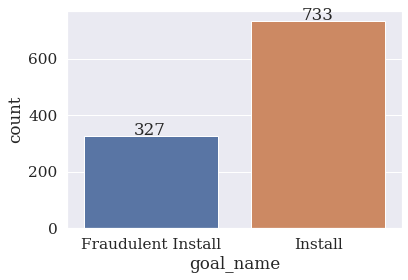

In [14]:
ax = sns.countplot(data=df, x='goal_name')
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+4))
plt.show()

### Histórico de Instalações

In [15]:
print( len(df['event_time'].dt.date.unique()) )
print( len(df['click_time'].dt.date.unique()) )

22
17


In [16]:
#df.groupby('date')['goal_name'].count()
df_date_aux=df.groupby('date')['goal_name'].value_counts().to_frame()
df_date_aux.rename(columns={'goal_name':'count'},inplace=True)
df_date_aux.reset_index(inplace=True)
#display(df_date_aux)

df_date=df_date_aux.pivot(index='date', columns='goal_name', values='count').fillna(0)
df_date=df_date.transpose().reset_index(level=0, drop=True).transpose().reset_index().rename(columns={0:'Fraudulent Install',1:'Install'})
df_date['total_install']=df_date['Fraudulent Install'].values+df_date['Install'].values
display(df_date)

,date,Fraudulent Install,Install,total_install
0,2021-04-14,5.0,101.0,106.0
1,2021-04-15,2.0,123.0,125.0
2,2021-04-16,5.0,91.0,96.0
3,2021-04-17,4.0,114.0,118.0
4,2021-04-18,6.0,99.0,105.0
5,2021-04-19,8.0,102.0,110.0
6,2021-04-20,2.0,86.0,88.0
7,2021-04-21,13.0,1.0,14.0
8,2021-04-22,9.0,1.0,10.0
9,2021-04-23,19.0,0.0,19.0


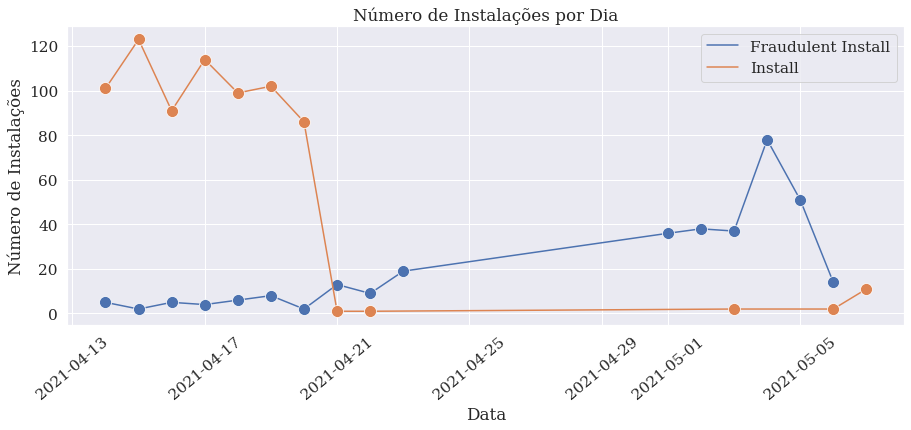

In [17]:
plt.figure(figsize=(15,5.5))
sns.lineplot(data=df_date_aux, x='date', y='count', hue='goal_name',
             linewidth=1.5, linestyle='-', marker='o',  markersize=12)
plt.legend(loc='upper right')
plt.xticks(rotation=40)
plt.xlabel('Data')
plt.ylabel('Número de Instalações')
plt.title('Número de Instalações por Dia')
plt.show()

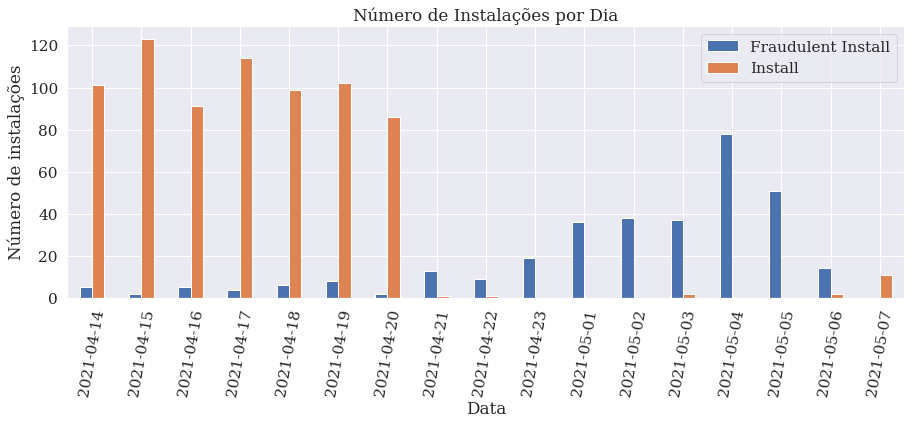

In [18]:
df_date.plot(x='date', y=['Fraudulent Install','Install'],
                                             kind='bar',
                                             rot=80, figsize=(15,5),
                                             xlabel='Data',
                                             ylabel='Número de instalações',
                                             title='Número de Instalações por Dia')
plt.show()

### Time_difference

In [19]:
print('Time_difference - Fraude:')
min=df[(df['goal_name']=='Fraudulent Install')]['time_difference'].min()
max=df[(df['goal_name']=='Fraudulent Install')]['time_difference'].max()
print( f'min = {min} s' )
print( f'max = {max} s' )

print()
print('Time_difference - Não fraude:')
min=df[(df['goal_name']=='Install')]['time_difference'].min()
max=df[(df['goal_name']=='Install')]['time_difference'].max()
print( f'min = {min} s' )
print( f'max = {max} s' )

Time_difference - Fraude:
min = 34.0 s
max = 209595.0 s

Time_difference - Não fraude:
min = 67.0 s
max = 601943.0 s


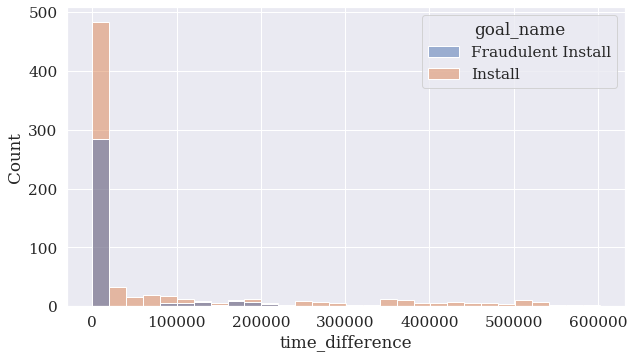

In [20]:
#Distribuição dos intervalos de tempo entre as ações de clicar na propaganda e instalar o aplicativo:
plt.figure(figsize=(10,5.5))
sns.histplot(data=df, x='time_difference', hue='goal_name', bins=30); plt.show()

Note que a maioria das fraudes possui um curto intervalo de tempo.


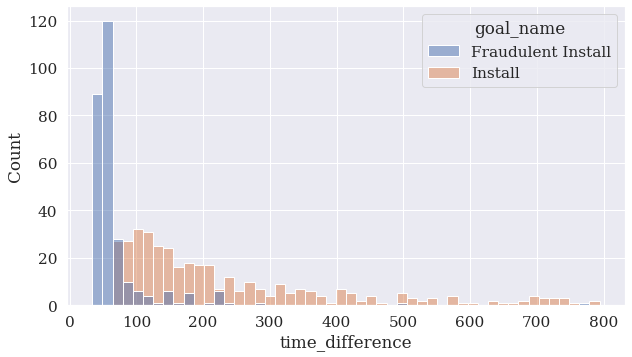

In [21]:
#Distribuição dos intervalos de tempo (menores que 800s) entre as ações de clicar na propaganda e instalar o aplicativo:
plt.figure(figsize=(10,5.5))
sns.histplot(data=df[(df['time_difference']<800)], x='time_difference', hue='goal_name', bins=50); plt.show()

### Device

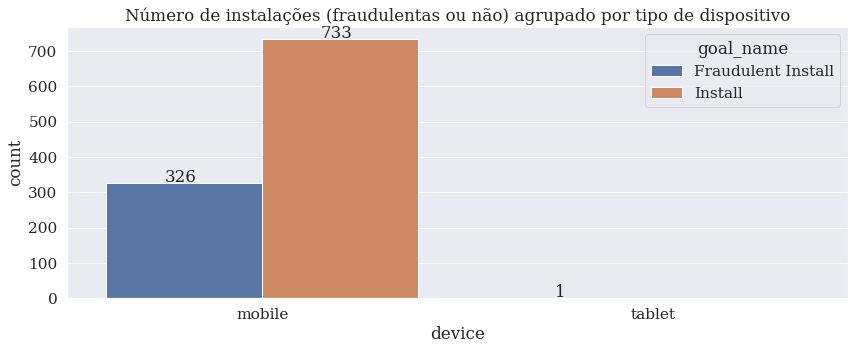

count
device goal_name                
mobile Fraudulent Install    326
       Install               733
tablet Fraudulent Install      1
       Install                 0

In [22]:
plt.figure(figsize=(14,5))
ax = sns.countplot(data=df, x='device', hue='goal_name')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+4))

plt.title('Número de instalações (fraudulentas ou não) agrupado por tipo de dispositivo')
plt.show()
##########
print()
display( df.groupby(['device','goal_name'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}) )

Note que a coluna 'device' contém apenas duas categorias, sendo que uma delas representa menos de 0.1% do total, o que significa que mais 99.9% do dados estão na mesma categoria de dispositivos, logo a informação dessa coluna não será relevante para a análise e previsão de fraudes, e deverá ser excluída.

In [23]:
df.drop(columns='device',inplace=True)

### App_name

In [24]:
#df.groupby(['app_name'])['goal_name'].unique()
df.groupby(['app_name','goal_name'])['goal_name'].count()

#groupedvalues=df.groupby(['app_name','goal_name']).count().reset_index()['os']
#display( groupedvalues )

#for idx in groupedvalues.index:
#  print(idx,groupedvalues.loc[idx])

app_name              goal_name         
com.busuu.android.en  Fraudulent Install     32
                      Install               691
com.getmimo           Fraudulent Install      0
                      Install                25
com.jotterpad.x       Fraudulent Install     41
                      Install                 2
com.myscript.neb      Fraudulent Install    240
                      Install                 0
com.topps.bunt        Fraudulent Install     14
                      Install                15
Name: goal_name, dtype: int64

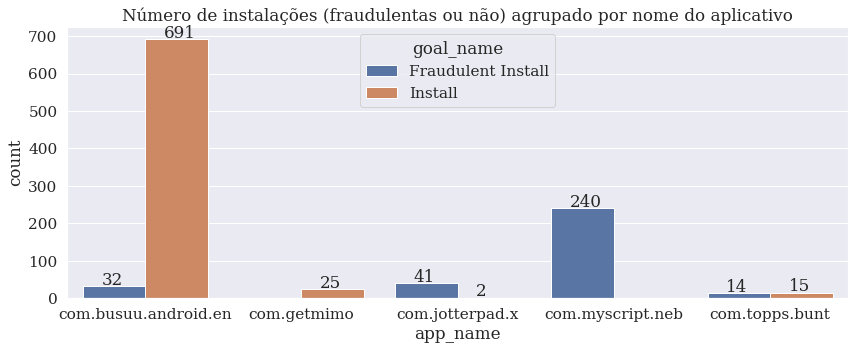

count
app_name             goal_name                
com.busuu.android.en Fraudulent Install     32
                     Install               691
com.getmimo          Fraudulent Install      0
                     Install                25
com.jotterpad.x      Fraudulent Install     41
                     Install                 2
com.myscript.neb     Fraudulent Install    240
                     Install                 0
com.topps.bunt       Fraudulent Install     14
                     Install                15

In [25]:
plt.figure(figsize=(14,5))
ax = sns.countplot(data=df, x='app_name', hue='goal_name')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+4))

plt.title('Número de instalações (fraudulentas ou não) agrupado por nome do aplicativo')
plt.show()
##########
print()
display( df.groupby(['app_name','goal_name'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}) )

### Sistema operacional (os)

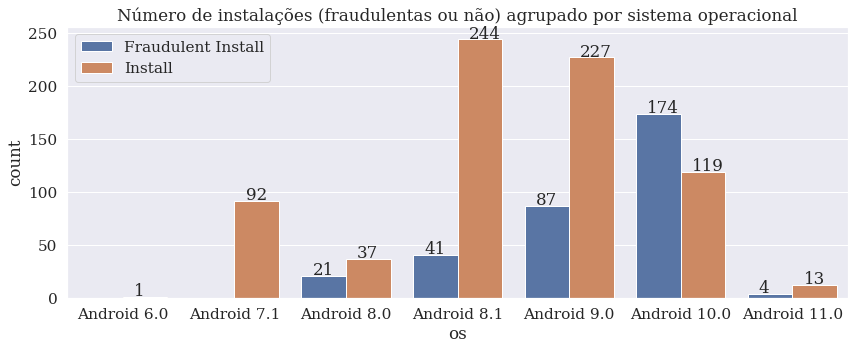

count
os           goal_name                
Android 6.0  Fraudulent Install      0
             Install                 1
Android 7.1  Fraudulent Install      0
             Install                92
Android 8.0  Fraudulent Install     21
             Install                37
Android 8.1  Fraudulent Install     41
             Install               244
Android 9.0  Fraudulent Install     87
             Install               227
Android 10.0 Fraudulent Install    174
             Install               119
Android 11.0 Fraudulent Install      4
             Install                13

In [26]:
plt.figure(figsize=(14,5))
ax = sns.countplot(data=df, x='os', hue='goal_name')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

plt.legend(loc='upper left')
plt.title('Número de instalações (fraudulentas ou não) agrupado por sistema operacional')
plt.show()
##########
print()
display( df.groupby(['os','goal_name'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}) )

### Browser

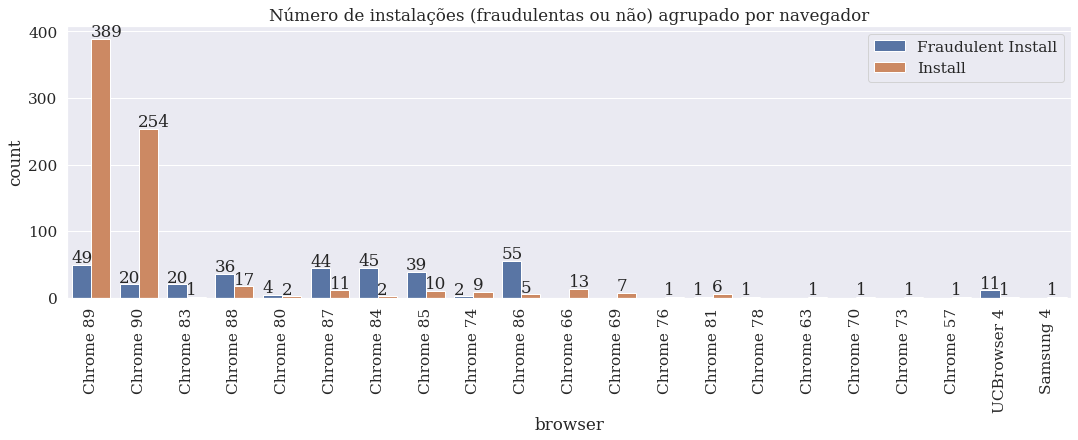

In [27]:
plt.figure(figsize=(18,5))
ax = sns.countplot(data=df, x='browser', hue='goal_name')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+4))

plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('Número de instalações (fraudulentas ou não) agrupado por navegador')
plt.show()
##########
#print()
#display( df.groupby(['browser','goal_name'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}) )

Agrupar 'browser' em apenas 3 categorias: os 2 principais browser (89, 90) e Outros:

In [28]:
aux=df.groupby(['browser'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}).sort_values('count',ascending=False).index[:2]
aux

Index(['Chrome 89', 'Chrome 90'], dtype='object', name='browser')

In [29]:
display( df[(df['browser']!=aux[0]) & (df['browser']!=aux[1])]['browser'] )
filtro=(df['browser']!=aux[0]) & (df['browser']!=aux[1])
df.loc[filtro,'browser']='Outros'

print()
display( df['browser'].unique() )

7         Chrome 83
9         Chrome 88
12        Chrome 80
14        Chrome 80
19        Chrome 87
           ...     
1031      Chrome 80
1038      Samsung 4
1041      Chrome 88
1045    UCBrowser 4
1050      Chrome 74
Name: browser, Length: 348, dtype: object

array(['Chrome 89', 'Chrome 90', 'Outros'], dtype=object)

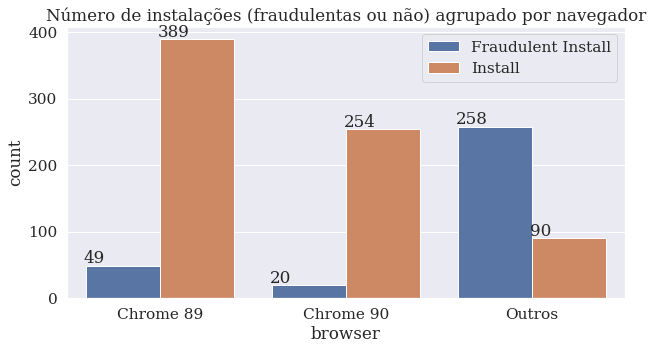

count
browser   goal_name                
Chrome 89 Fraudulent Install     49
          Install               389
Chrome 90 Fraudulent Install     20
          Install               254
Outros    Fraudulent Install    258
          Install                90

In [30]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='browser', hue='goal_name')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+4))

plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.title('Número de instalações (fraudulentas ou não) agrupado por navegador')
plt.show()
##########
print()
display( df.groupby(['browser','goal_name'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}) )

### Cidade

In [31]:
#W=df.groupby(by=['city'])['goal_name'].value_counts().sort_values(ascending=False).to_frame()
W=df.groupby(by=['city'])['goal_name'].value_counts().to_frame()
W.rename(columns={'goal_name':'count'},inplace=True)
W.reset_index(inplace=True)
#display(W)

df_city=W.pivot(index='city', columns='goal_name', values='count').fillna(0)
df_city=df_city.transpose().reset_index(level=0, drop=True).transpose().reset_index().rename(columns={0:'Fraudulent Install',1:'Install'})
df_city['total_install']=df_city['Fraudulent Install'].values+df_city['Install'].values
df_city=df_city.sort_values('total_install', ascending=False).reset_index(drop=True)
display(df_city)

,city,Fraudulent Install,Install,total_install
0,IGRAPIÚNA,35.0,96.0,131.0
1,FEIRA DE SANTANA,24.0,58.0,82.0
2,ANGICAL,10.0,25.0,35.0
3,AMARGOSA,5.0,22.0,27.0
4,ARACATU,8.0,16.0,24.0
...,...,...,...,...
402,CORONEL JOÃO SÁ,0.0,1.0,1.0
403,CORIBE,1.0,0.0,1.0
404,CORDEIROS,0.0,1.0,1.0
405,CORAÇÃO DE MARIA,0.0,1.0,1.0


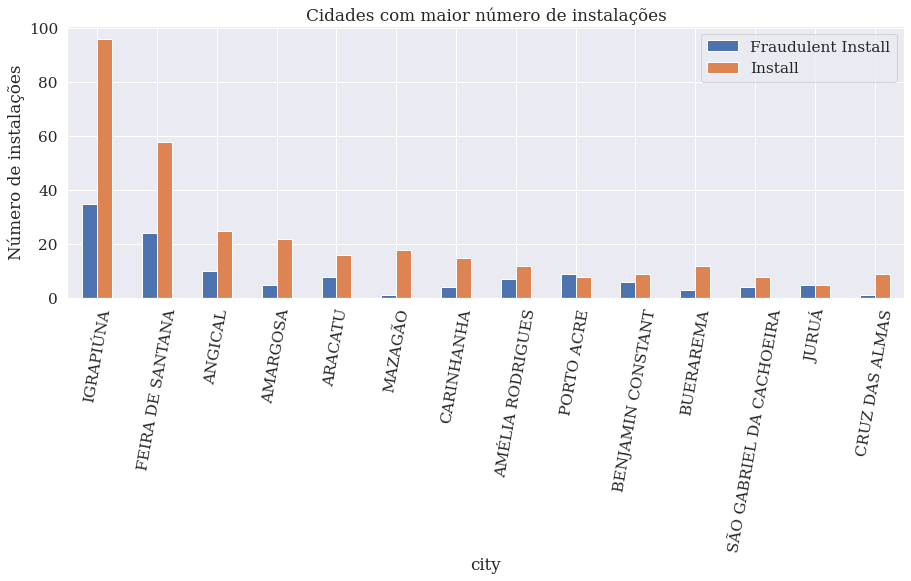

In [32]:
df_city[(df_city['total_install']>=10)].plot(x='city', y=['Fraudulent Install','Install'],
                                             kind='bar',
                                             rot=80, figsize=(15,5),
                                             ylabel='Número de instalações',
                                             title='Cidades com maior número de instalações')
plt.show()

Agrupar 'city' em apenas 11 categorias: as 10 cidades com maior núm. de instalações e Outras:

In [33]:
aux=df.groupby(['city'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}).sort_values('count',ascending=False).index[:10]
aux

Index(['IGRAPIÚNA', 'FEIRA DE SANTANA', 'ANGICAL', 'AMARGOSA', 'ARACATU',
       'MAZAGÃO', 'CARINHANHA', 'AMÉLIA RODRIGUES', 'PORTO ACRE',
       'BENJAMIN CONSTANT'],
      dtype='object', name='city')

In [34]:
#display( df.loc[df['city'].isin(aux)]['city'] )
display( df.loc[~df['city'].isin(aux)]['city'] )  #not in

filtro=df.loc[~df['city'].isin(aux)].index
df.loc[filtro,'city']='Outras'

print()
display( df['city'].unique() )

0       SENADOR RUI PALMEIRA
1                   CORURIPE
2                   ARATUÍPE
3            TEOTÔNIO VILELA
4                  MARIBONDO
                ...         
1055                 ITABUNA
1056                  ITIÚBA
1057                  JAPURÁ
1058               BUERAREMA
1059        ITAJU DO COLÔNIA
Name: city, Length: 672, dtype: object

array(['Outras', 'MAZAGÃO', 'FEIRA DE SANTANA', 'AMARGOSA',
       'AMÉLIA RODRIGUES', 'IGRAPIÚNA', 'ARACATU', 'BENJAMIN CONSTANT',
       'ANGICAL', 'CARINHANHA', 'PORTO ACRE'], dtype=object)

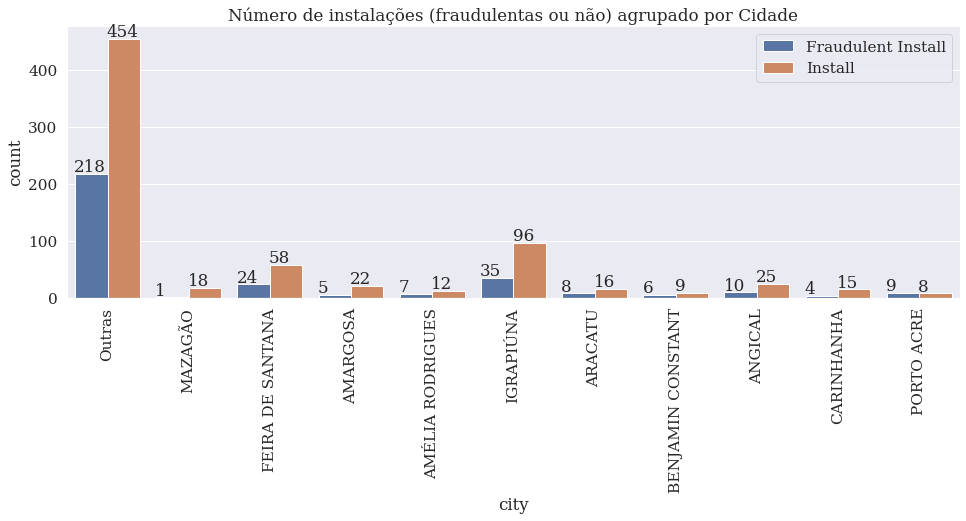

In [35]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data=df, x='city', hue='goal_name')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+4))

plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('Número de instalações (fraudulentas ou não) agrupado por Cidade')
plt.show()
##########
#print()
#display( df.groupby(['city','goal_name'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}) )

### Provedor de internet (isp)

In [36]:
#Número de provedores de internet:
len(df['isp'].unique())

481

Agrupar 'ips' em apenas 11 categorias: os 10 provedores com maior núm. de instalações e Outros:

In [37]:
aux=df.groupby(['isp'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}).sort_values('count',ascending=False).index[:10]
aux

Index(['Provedora de Internet 5', 'Provedora de Internet 10',
       'Provedora de Internet 15', 'Provedora de Internet 8',
       'Provedora de Internet 50', 'Provedora de Internet 6',
       'Provedora de Internet 16', 'Provedora de Internet 1',
       'Provedora de Internet 41', 'Provedora de Internet 83'],
      dtype='object', name='isp')

In [38]:
#display( df.loc[df['isp'].isin(aux)]['isp'] )  #in
display( df.loc[~df['isp'].isin(aux)]['isp'] )  #not in

filtro=df.loc[~df['isp'].isin(aux)].index
df.loc[filtro,'isp']='Outros'

print()
display( df['isp'].unique() )

1         Provedora de Internet 2
2         Provedora de Internet 3
3         Provedora de Internet 4
5         Provedora de Internet 4
8         Provedora de Internet 7
                  ...            
1051    Provedora de Internet 480
1052    Provedora de Internet 481
1053    Provedora de Internet 482
1055    Provedora de Internet 483
1057    Provedora de Internet 484
Name: isp, Length: 562, dtype: object

array(['Provedora de Internet 1', 'Outros', 'Provedora de Internet 5',
       'Provedora de Internet 6', 'Provedora de Internet 8',
       'Provedora de Internet 10', 'Provedora de Internet 15',
       'Provedora de Internet 16', 'Provedora de Internet 41',
       'Provedora de Internet 50', 'Provedora de Internet 83'],
      dtype=object)

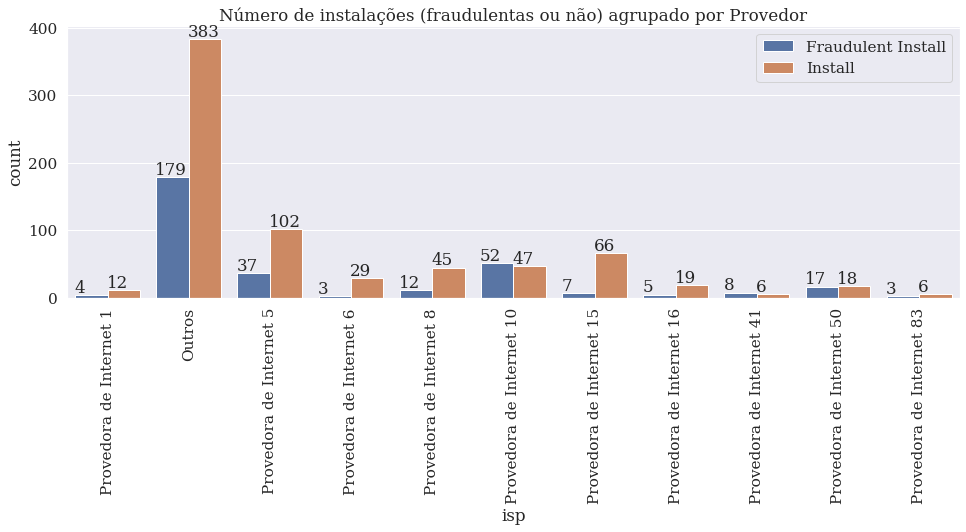

In [39]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data=df, x='isp', hue='goal_name')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+4))

plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('Número de instalações (fraudulentas ou não) agrupado por Provedor')
plt.show()
##########
#print()
#display( df.groupby(['isp','goal_name'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}) )

### source_id

In [40]:
df['source_id'].unique()

array([145, 282, 286, 182, 254])

In [41]:
df['source_id']=df['source_id'].astype('category')

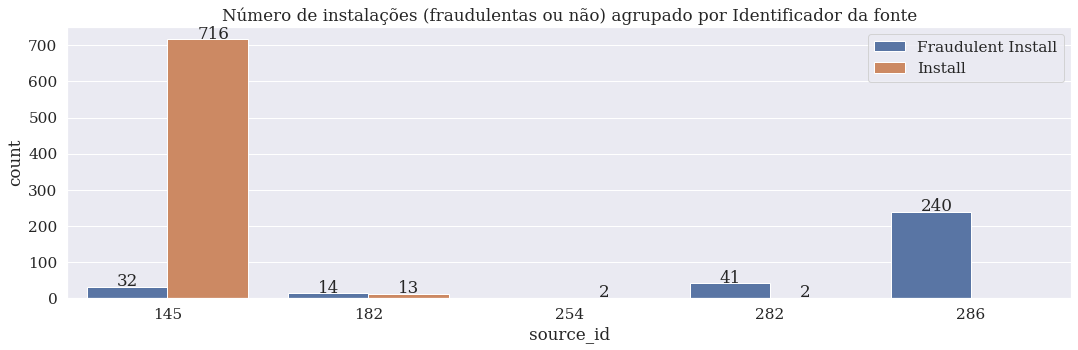

count
source_id goal_name                
145       Fraudulent Install     32
          Install               716
182       Fraudulent Install     14
          Install                13
254       Fraudulent Install      0
          Install                 2
282       Fraudulent Install     41
          Install                 2
286       Fraudulent Install    240
          Install                 0

In [42]:
plt.figure(figsize=(18,5))
ax = sns.countplot(data=df, x='source_id', hue='goal_name')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))

plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.title('Número de instalações (fraudulentas ou não) agrupado por Identificador da fonte')
plt.show()
##########
print()
display( df.groupby(['source_id','goal_name'])['goal_name'].count().to_frame().rename(columns={'goal_name':'count'}) )

### device_id

In [43]:
print(f"Número de linhas da tabela = {len( df['device_id'])}")
print(f"Número de device_id únicos na tabela = {len( df['device_id'].unique())}")

Número de linhas da tabela = 1060
Número de device_id únicos na tabela = 1060


Como nenhum dispositivo (ou device_id) se repete nessa base de dados, a informação 'device_id' é irrelevante para a previsão de fraudes, por isso essa coluna será deletada.

In [44]:
df.drop(columns='device_id',inplace=True)

## Salvar dataframe

In [45]:
#Salvar dados em arquivo CSV:
df.to_csv('Conversions.csv', index=False)

# Previsão de Fraudes

## Importação de Bibliotecas

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import numpy as np

In [47]:
#Modelos de Classificação:
from sklearn.svm import SVC                             #Suport Vector Machine
from sklearn.ensemble import RandomForestClassifier     #Floresta aleatória
from sklearn.tree import DecisionTreeClassifier         #Árvore de decisão
from sklearn.neighbors import KNeighborsClassifier      #K-Vizinhos mais próximos
from sklearn.linear_model import LogisticRegression     #Regressão Logística
from sklearn.ensemble import GradientBoostingClassifier #Gradient boosting estocástico

## Transformação de dados

In [68]:
df = pd.read_csv('Conversions.csv')

In [69]:
#Remover colunas da análise:
df.drop(columns=['date','event_time','click_time'],inplace=True)

In [70]:
#Codificação Distribuída (One-hot encoder)
list_to_one_hot=['source_id','browser']   #['app_name','os']
df=pd.get_dummies(df, columns=list_to_one_hot)
df.head(4)

,app_name,city,os,goal_name,isp,time_difference,source_id_145,source_id_182,source_id_254,source_id_282,source_id_286,browser_Chrome 89,browser_Chrome 90,browser_Outros
0,com.busuu.android.en,Outras,Android 7.1,Install,Provedora de Internet 1,182.0,1,0,0,0,0,1,0,0
1,com.busuu.android.en,Outras,Android 9.0,Install,Outros,82.0,1,0,0,0,0,1,0,0
2,com.busuu.android.en,Outras,Android 10.0,Install,Outros,153.0,1,0,0,0,0,1,0,0
3,com.busuu.android.en,Outras,Android 9.0,Install,Outros,741.0,1,0,0,0,0,0,1,0


In [71]:
#Transforma tipo objeto em categoria:
for col in df.columns[df.dtypes=='object']:
  df[col]= df[col].astype('category')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   app_name           1060 non-null   category
 1   city               1060 non-null   category
 2   os                 1060 non-null   category
 3   goal_name          1060 non-null   category
 4   isp                1060 non-null   category
 5   time_difference    1060 non-null   float64 
 6   source_id_145      1060 non-null   uint8   
 7   source_id_182      1060 non-null   uint8   
 8   source_id_254      1060 non-null   uint8   
 9   source_id_282      1060 non-null   uint8   
 10  source_id_286      1060 non-null   uint8   
 11  browser_Chrome 89  1060 non-null   uint8   
 12  browser_Chrome 90  1060 non-null   uint8   
 13  browser_Outros     1060 non-null   uint8   
dtypes: category(5), float64(1), uint8(8)
memory usage: 23.3 KB


In [73]:
#Reordenando categoria de modo que não-fraude fique com o código 0 e fraude, 1:
df['goal_name'].cat.reorder_categories(['Install', 'Fraudulent Install'], ordered=True, inplace=True)
print( df['goal_name'].unique() )

print()
for categ in df['goal_name'].unique():
  cod = df[(df['goal_name']==categ)]['goal_name'].cat.codes.values[0]
  print( f'Categoria: \'{categ}\' -> código: {cod}' )

['Install', 'Fraudulent Install']
Categories (2, object): ['Install' < 'Fraudulent Install']

Categoria: 'Install' -> código: 0
Categoria: 'Fraudulent Install' -> código: 1


In [74]:
#Transforma as categorias em números_códigos:
for col in df.columns[df.dtypes=='category']:
  df[col]= df[col].cat.codes

In [75]:
df.sample(6)

,app_name,city,os,goal_name,isp,time_difference,source_id_145,source_id_182,source_id_254,source_id_282,source_id_286,browser_Chrome 89,browser_Chrome 90,browser_Outros
676,0,9,6,0,6,656.0,1,0,0,0,0,0,0,1
217,0,7,5,0,3,164.0,1,0,0,0,0,0,0,1
680,0,9,3,0,0,136.0,1,0,0,0,0,1,0,0
1,0,9,6,0,0,82.0,1,0,0,0,0,1,0,0
675,0,9,6,0,6,2470.0,1,0,0,0,0,1,0,0
720,0,7,6,0,6,124.0,1,0,0,0,0,0,1,0


In [76]:
#Separa os labels do conjunto de parâmetros
y = df.goal_name
X = df.drop('goal_name', axis=1)

### Separar dados de treino e de teste

In [77]:
#Separar dados de treino_validação e de teste:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [78]:
#Separar dados de treino e de 'validação dos modelos':
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25, random_state=42, shuffle=True, stratify=y_train)

In [79]:
#Verificar dimensões dos datasets:
X_train.shape,y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape

((636, 13), (636,), (212, 13), (212,), (212, 13), (212,))

In [80]:
#Verificar se dividiu na proporção correta:
sum(y_train)/len(y_train), sum(y_val)/len(y_val), sum(y_test)/len(y_test)

(0.30974842767295596, 0.30660377358490565, 0.30660377358490565)

### Normalizar dados

In [81]:
#Normalizar dados:
norm = 1
if norm == True:
  scaler_norm = MinMaxScaler().fit(X_train)
  X_train = pd.DataFrame( scaler_norm.transform(X_train), columns=df.columns.drop('goal_name'))
  X_val   = pd.DataFrame( scaler_norm.transform(X_val),   columns=df.columns.drop('goal_name'))
  X_test  = pd.DataFrame( scaler_norm.transform(X_test),  columns=df.columns.drop('goal_name'))
  display(X_train.sample(4))

,app_name,city,os,isp,time_difference,source_id_145,source_id_182,source_id_254,source_id_282,source_id_286,browser_Chrome 89,browser_Chrome 90,browser_Outros
432,0.75,0.9,0.833333,0.0,0.000027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
630,0.00,0.9,0.833333,0.0,0.117009,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
257,1.00,0.9,0.833333,0.2,0.002838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
327,0.00,0.9,0.833333,0.9,0.000347,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Seleção do Modelo

In [82]:
models_and_hyperparameters = {
    'svm': ( SVC(),
           {'kernel': ['rbf','poly','sigmoid'], 'gamma': ['scale', 1e-4, 1e-3], 'C': [10, 100, 1000]} ),
    'rf' : ( RandomForestClassifier(),
           {'bootstrap': [True, False], 'n_estimators': [100, 200],
            'max_features': ['auto', None, 'log2'], 'max_depth': [None, 5, 10, 50]} ),
    'dt' : ( DecisionTreeClassifier(),
           {'max_depth': [3, 5, 10], 'criterion': ['gini','entropy'],
            'min_samples_split': [32, 64], 'min_samples_leaf': [32, 64]} ),
    'knn': ( KNeighborsClassifier(),
           {'n_neighbors': [1,3,5,7,9,11], 'weights': ['uniform','distance'],
            'metric': ['minkowski','euclidean','manhattan']} ),
    'lr' : ( LogisticRegression(),
           {'solver': ['newton-cg', 'lbfgs', 'sag'],
            'C': [100, 10, 1.0, 0.1], 'penalty': ['l2']} ),
    'gb' : ( GradientBoostingClassifier(),
           {'n_estimators': [10, 100], 'learning_rate': [0.01, 0.1],
            'subsample': [0.5, 0.7, 1.0], 'max_depth': [3, 7, 9]})
    }
Scores = 'f1'

In [83]:
#Selecionar os hiperparametros que maximizam os scores de cada algoritmo selecionado:
%%time
score_result_train=[]
score_result_val=[]
params_result=[]

#Estimate performance of hyperparameter tuning and model algorithm pipeline
for name, (model, params) in models_and_hyperparameters.items():
  #Grid para k-fold de 10 dobras:
  clf = GridSearchCV(model, params, scoring=Scores, cv=10, n_jobs=-1)

  clf.fit(X_train, y_train)

  print("Grid scores on development set:")
  means = clf.cv_results_['mean_test_score']
  stds  = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std*2, params))
  print()

  ##########
  #Aplicar o Modelo com os melhores hiperparâmetros sobre o conjunto de Validação:
  clf_best = model.set_params(**clf.best_params_)
  clf_best.fit(X_train, y_train)
  y_pred = clf_best.predict(X_val)
  score_result_val.append( metrics.f1_score(y_val,y_pred) )
  ##########

  score_result_train.append(clf.best_score_)
  params_result.append(clf.best_params_)

  model_name = type(model).__name__
  print(f'Model: {model_name}, F1_train: {clf.best_score_:.4f}, F1_val: {score_result_val[-1]:.5f}')
  print(f'Best parameters: {clf.best_params_}')
  print(70*'-','\n')

Grid scores on development set:
0.893 (+/-0.103) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.890 (+/-0.098) for {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.832 (+/-0.128) for {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.905 (+/-0.095) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.905 (+/-0.095) for {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.882 (+/-0.100) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.863 (+/-0.082) for {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
0.783 (+/-0.118) for {'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.905 (+/-0.095) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.905 (+/-0.095) for {'C': 10

In [84]:
#Escolher o modelo (algoritmo já com os melhores hiperparâmetros) com o score máximo sobre o conj. de validação:

score_result=score_result_val
#score_result=score_result_train

best_idx = score_result_val.index(np.max(score_result))
key = list(models_and_hyperparameters.keys())[best_idx]
best_model = models_and_hyperparameters[key][0]

print(f'Best Model: {type(best_model).__name__}, F1: {np.max(score_result)}')
print(f'Best parameters: {params_result[best_idx]}')

print()
best_model.set_params(**params_result[best_idx])
#print(best_model)

Best Model: RandomForestClassifier, F1: 0.9692307692307692
Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
#Aplicar modelo ao conjunto de teste:
y_pred = best_model.predict(X_test)
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.97      0.98      0.98        65

    accuracy                           0.99       212
   macro avg       0.98      0.99      0.98       212
weighted avg       0.99      0.99      0.99       212



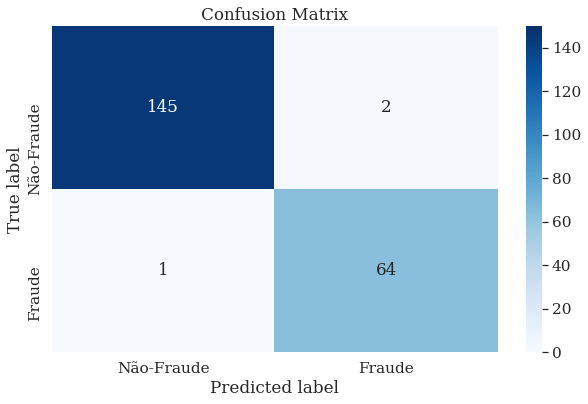

In [86]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
target_names = ['Não-Fraude', 'Fraude'] #'0', '1'

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='.0f',
            vmin=0, vmax=150, xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix'); plt.xlabel('Predicted label'); plt.ylabel('True label')
plt.show()

In [87]:
print(f'Como é possível ver na matriz de confusão, apenas {np.sum(cm)-np.trace(cm)} instalações',end=' ')
print('foram classificadas erroneamente nos dados de teste.')

Como é possível ver na matriz de confusão, apenas 3 instalações foram classificadas erroneamente nos dados de teste.


______________
______________